## Fraud Detection - Imbalanced Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as grs
import seaborn as sns
from sklearn.manifold import TSNE



In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.isnull().sum().max()

0

Non-Frauds and Frauds Exist In the Dataset: 284315 492
Frauds Percentage of Total Values: 0.173


Text(1, 492, '492')

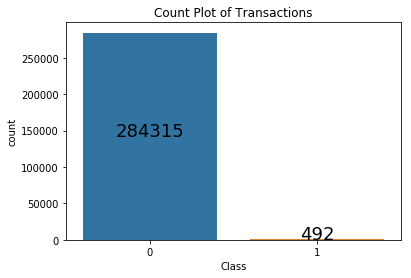

In [4]:
non_fraud, fraud = data['Class'].value_counts()
print('Non-Frauds and Frauds Exist In the Dataset:', non_fraud, fraud)
print('Frauds Percentage of Total Values:', round(data['Class'].value_counts()[1]/len(data) * 100,3))

sns.countplot(data=data, x='Class')
plt.title("Count Plot of Transactions")
plt.text(0, non_fraud//2, non_fraud, fontsize = 18,  horizontalalignment='center')
plt.text(1, fraud, fraud, fontsize = 18, horizontalalignment='center')

In [22]:
fr_df = data.loc[data['Class'] == 1]


fr_df[['Time', 'Amount']].describe()

,Time,Amount
count,492.000000,492.000000
mean,80746.806911,122.211321
std,47835.365138,256.683288
min,406.000000,0.000000
25%,41241.500000,1.000000
50%,75568.500000,9.250000
75%,128483.000000,105.890000
max,170348.000000,2125.870000


In [28]:
print("amount  count")
print(fr_df['Amount'].value_counts().head())

amount  count
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


In [21]:
nf_df = data.loc[data['Class'] == 0]

nf_df[['Time', 'Amount']].describe()

,Time,Amount
count,284315.000000,284315.000000
mean,94838.202258,88.291022
std,47484.015786,250.105092
min,0.000000,0.000000
25%,54230.000000,5.650000
50%,84711.000000,22.000000
75%,139333.000000,77.050000
max,172792.000000,25691.160000


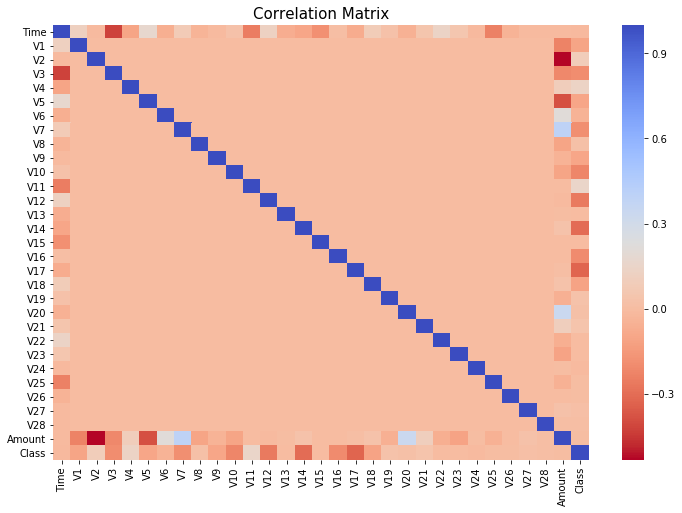

In [6]:
plt.subplots(figsize=(12,8))
plt.title("Correlation Matrix", fontsize=15)
sns.heatmap(data.corr(), cmap='coolwarm_r', annot_kws={'size':20})

The peak of time is probably the daily routine of people. 

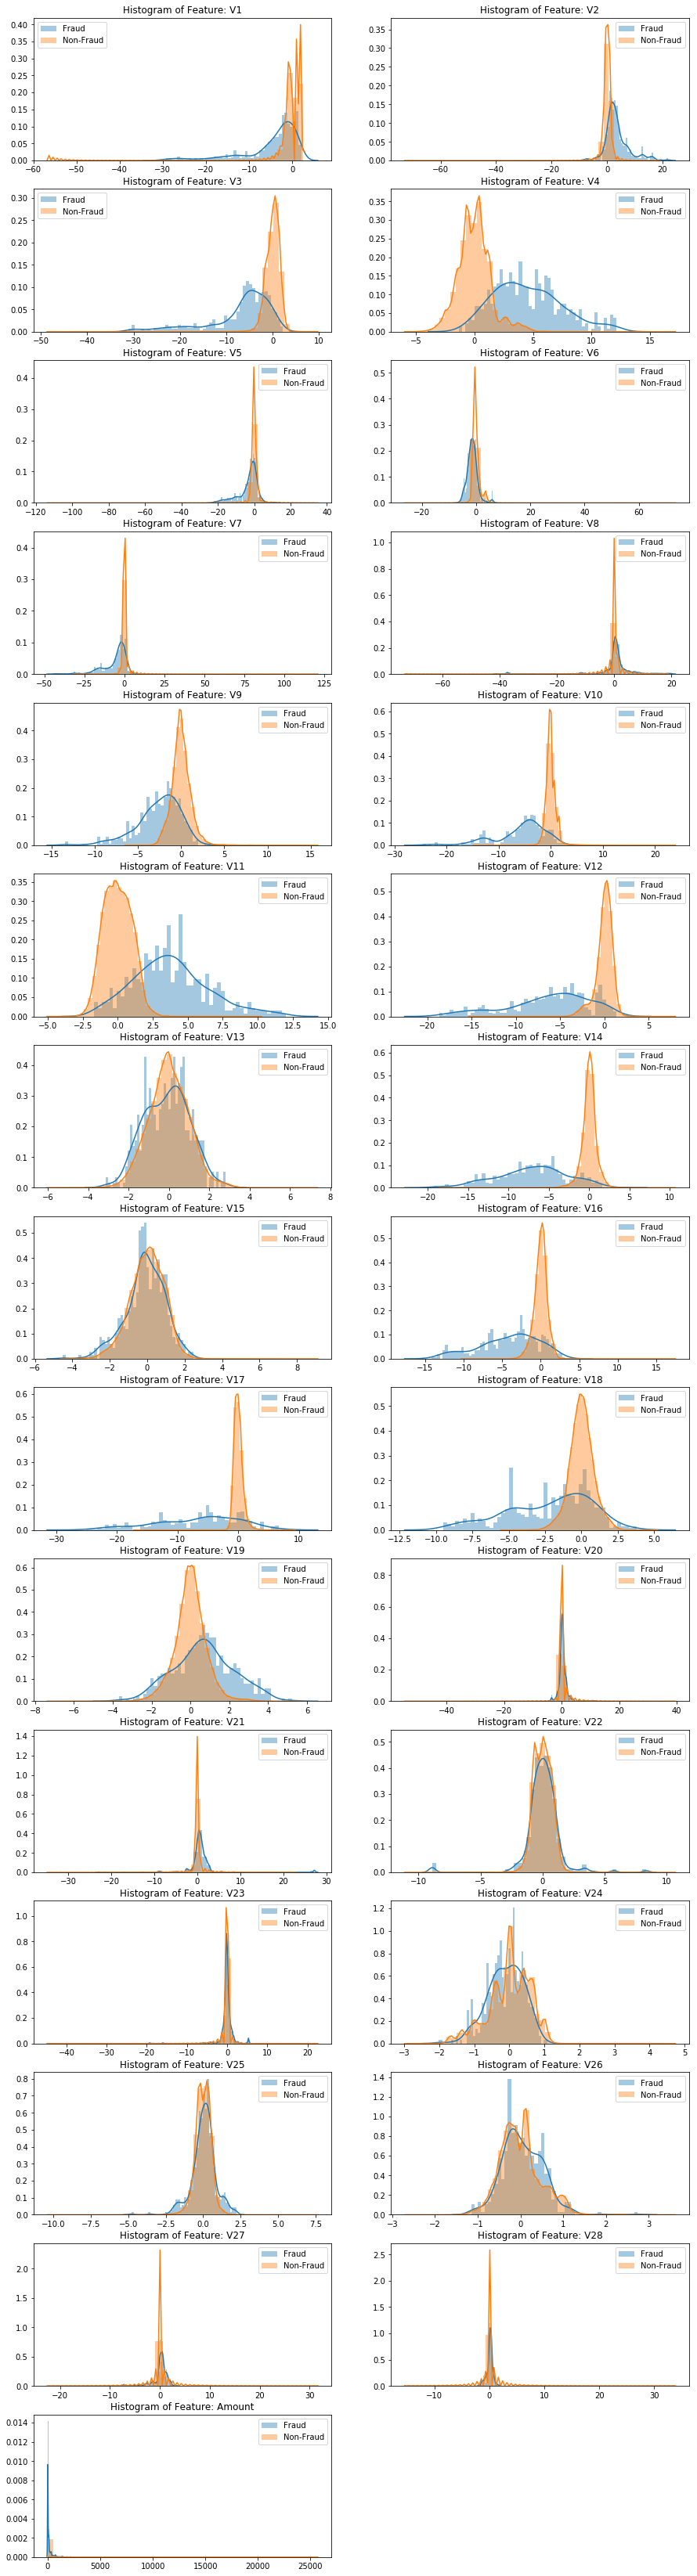

<Figure size 432x288 with 0 Axes>

In [29]:
features = data.iloc[:,1:30].columns
plt.figure(figsize=(15,29*4))
gs = grs.GridSpec(29, 2)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=50, label="Fraud")
    sns.distplot(data[c][data.Class == 0], bins=50, label="Non-Fraud")
    ax.legend()
    ax.set_xlabel('')
    ax.set_title('Histogram of Feature: ' + str(c))
plt.show()

non fraud transactions are close together while the fraud ones are spread out.

(406.0, 170348.0)

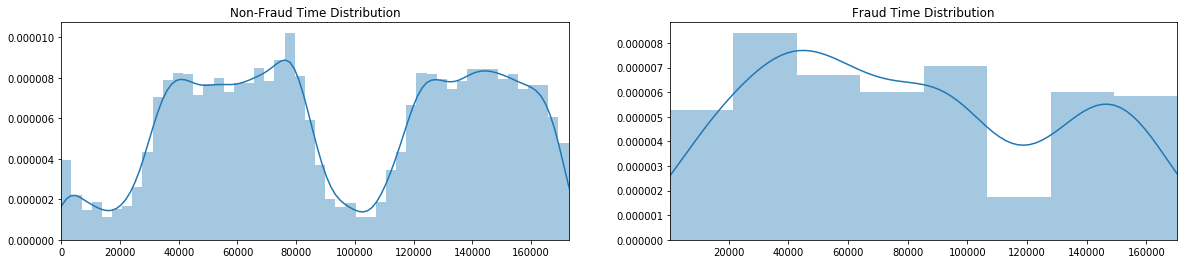

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))

nf = data[data.Class == 0].Time.values
fr = data[data.Class == 1].Time.values

sns.distplot(nf, ax=ax[0], kde=True)
ax[0].set_title('Non-Fraud Time Distribution')
ax[0].set_xlim([min(nf), max(nf)])

sns.distplot(fr, ax=ax[1], kde=True)
ax[1].set_title('Fraud Time Distribution')
ax[1].set_xlim([min(fr), max(fr)])

(0.0, 2125.87)

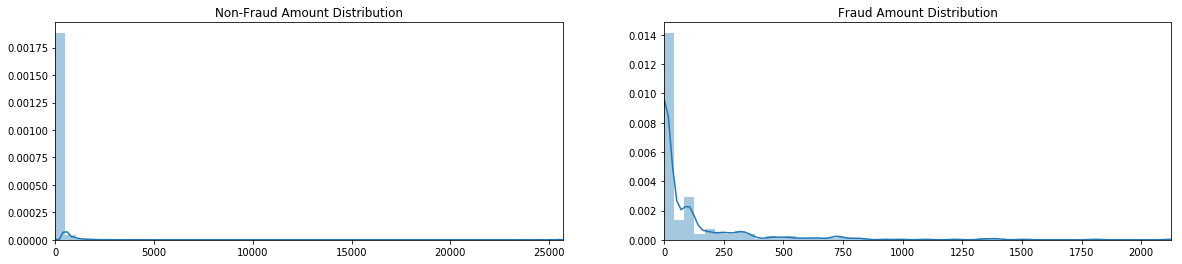

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))

nf = data[data.Class == 0].Amount.values
fr = data[data.Class == 1].Amount.values

sns.distplot(nf, ax=ax[0], kde=True)
ax[0].set_title('Non-Fraud Amount Distribution')
ax[0].set_xlim([min(nf), max(nf)])

sns.distplot(fr, ax=ax[1], kde=True)
ax[1].set_title('Fraud Amount Distribution')
ax[1].set_xlim([min(fr), max(fr)])

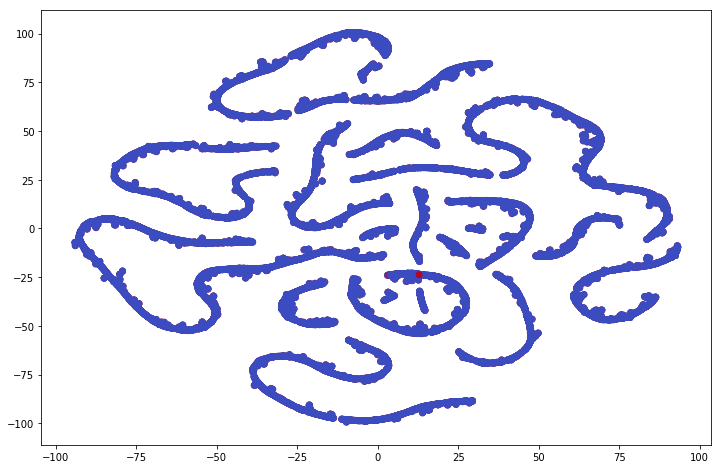

In [18]:
random_sample = data.sample(n=10000)

X = random_sample.drop('Class', axis=1)
y = random_sample['Class']

X_t = TSNE(n_components=2, random_state=0).fit_transform(X)


plt.figure(figsize=(12, 8))
plt.scatter(X_t[:,0], X_t[:,1], c=(y == 1), cmap='coolwarm_r')
plt.scatter(X_t[:,0], X_t[:,1], c=(y == 0), cmap='coolwarm_r')

# Sub Sampling 

So we get to 50/50 ratio of fraud and non-fraud transactions. 
This helps us to know the correlations between the features and fraud. 

we create a sub sample by adding the 492 fraud transactions to random 492 non fraud. 

In [11]:
nfr_df = data.loc[data['Class'] == 0][:492]
fr_df = data.loc[data['Class'] == 1]


unshuffled = pd.concat([nfr_df, fr_df])
sub_df = unshuffled.sample(frac=1)

In [12]:
sub_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
135,84.0,1.119272,-0.669639,0.803807,-0.651693,-1.395666,-0.800698,-0.601605,0.014390,2.019905,...,0.163687,0.546516,-0.176836,0.402556,0.563402,-0.534236,0.075047,0.042001,67.30,0
435,313.0,-0.907420,1.103912,1.288489,1.243612,-0.068032,0.214040,0.324000,0.436037,-0.437409,...,0.022520,0.399523,-0.049081,0.220258,-0.162924,-0.286994,0.015071,-0.104668,15.08,0
92,60.0,1.107029,0.216441,0.538378,1.476398,-0.251942,-0.340680,0.154092,-0.086503,0.144420,...,-0.060037,0.059884,-0.047526,0.443992,0.640296,-0.337657,0.042108,0.024265,26.72,0
165,105.0,1.000234,-0.295227,1.308259,1.257753,-0.967532,0.460245,-0.781850,0.424415,0.790908,...,0.032730,0.179644,0.028786,0.203489,0.234992,-0.408459,0.072615,0.028892,35.97,0


In [13]:
print('Frauds Exist In the Dataset:', sub_df['Class'].value_counts())
print('Frauds Percentage of Total Values:', round(sub_df['Class'].value_counts()[1]/len(sub_df) * 100,3))

Frauds Exist In the Dataset: 1    492
0    492
Name: Class, dtype: int64
Frauds Percentage of Total Values: 50.0


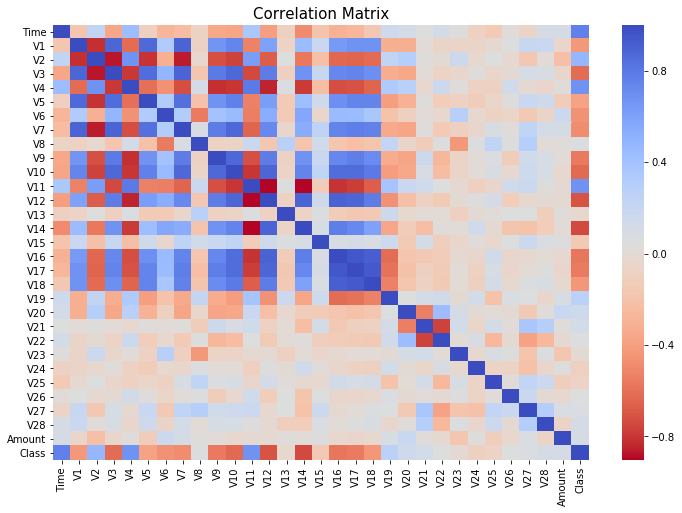

In [14]:
plt.subplots(figsize=(12,8))
plt.title("Correlation Matrix", fontsize=15)
sns.heatmap(sub_df.corr(), cmap='coolwarm_r', annot_kws={'size':20})

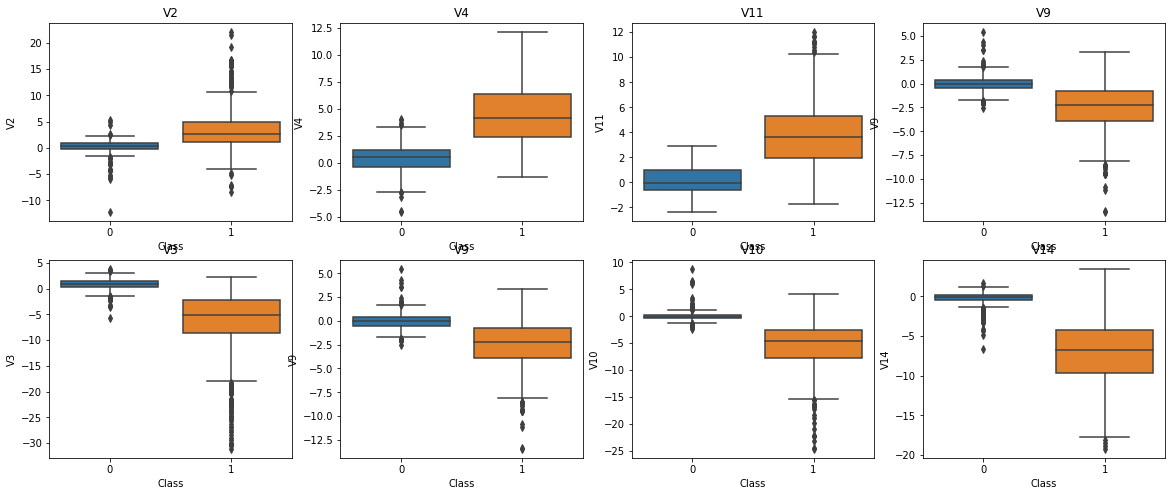

In [43]:
f, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,8))

sns.boxplot(x="Class", y="V2", data=sub_df, ax=ax[0, 0])
ax[0, 0].set_title('V2')

sns.boxplot(x="Class", y="V4", data=sub_df, ax=ax[0, 1])
ax[0, 1].set_title('V4')

sns.boxplot(x="Class", y="V11", data=sub_df, ax=ax[0, 2])
ax[0, 2].set_title('V11')

sns.boxplot(x="Class", y="V9", data=sub_df, ax=ax[0, 3])
ax[0, 3].set_title('V9')

sns.boxplot(x="Class", y="V3", data=sub_df, ax=ax[1, 0])
ax[1, 0].set_title('V3')

sns.boxplot(x="Class", y="V9", data=sub_df, ax=ax[1, 1])
ax[1, 1].set_title('V9')

sns.boxplot(x="Class", y="V10", data=sub_df, ax=ax[1, 2])
ax[1, 2].set_title('V10')

sns.boxplot(x="Class", y="V14", data=sub_df, ax=ax[1, 3])
ax[1, 3].set_title('V14')

plt.show()

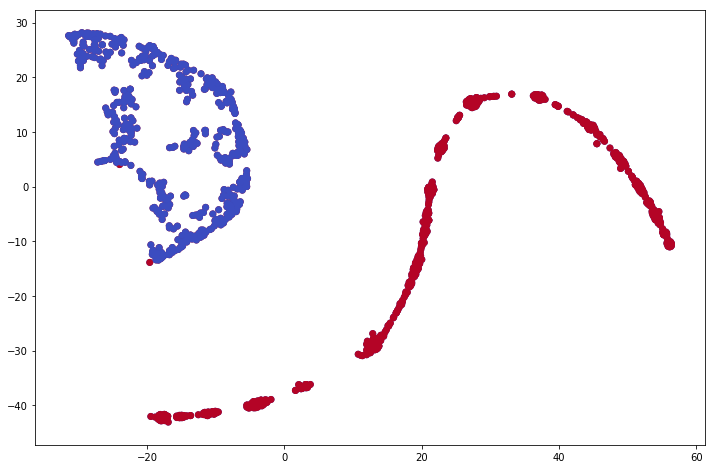

In [44]:
X = sub_df.copy().drop('Class', axis=1)
y = sub_df.copy()['Class']

X_t = TSNE(n_components=2, random_state=0).fit_transform(X)


plt.figure(figsize=(12, 8))
plt.scatter(X_t[:,0], X_t[:,1], c=(y == 1), cmap='coolwarm_r', label="Fraud")
plt.scatter(X_t[:,0], X_t[:,1], c=(y == 0), cmap='coolwarm_r', label="Non-Fraud")